<h3> About</h3>
This dataset contains latest Covid-19 India state-wise data as on August 25, 2021. This dataset can be used to analyze covid condition in India.
This dataset is great for Exploratory Data Analysis</br></br>
<h3>Attribute Information:</h3>
<ol>
    <li>State/UTs - Names of Indian States and Union Territories.</li>
<li>Total Cases - Total number of confirmed cases</li>
<li>Active - Total number of active cases</li>
<li>Discharged - Total number of discharged cases</li>
<li>Deaths - Total number of deaths</li>
<li>Active Ratio (%) - Ratio of number of active cases to total cases</li>
<li>Discharge Ratio (%) - Ratio of number of discharged cases to total cases</li>
<li>Death Ratio (%) - Ratio of number of deaths to total cases</li>
    
</ol>

In [11]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score


In [12]:
df = pd.read_csv('./Latest Covid-19 India Status.csv')
df

State/UTs  Total Cases  Active  Discharged  \
0                        Andaman and Nicobar         7560      10        7421   
1                             Andhra Pradesh      2004590   13677     1977163   
2                          Arunachal Pradesh        52409    1127       51023   
3                                      Assam       585689    8005      572084   
4                                      Bihar       725605     102      715853   
5                                 Chandigarh        65069      35       64222   
6                               Chhattisgarh      1004230     653      990022   
7   Dadra and Nagar Haveli and Daman and Diu        10659       4       10651   
8                                      Delhi      1437485     411     1411995   
9                                        Goa       173357     932      169239   
10                                   Gujarat       825330     160      815091   
11                                   Haryana       770380     664      760047   
12                          Himachal Pradesh       212260    2054      206628   
13                         Jammu and Kashmir       324420    1055      318961   
14                                 Jharkhand       347755     153      342470   
15                                 Karnataka      2941026   19810     2884032   
16                                    Kerala      3851984  159870     3672357   
17                                    Ladakh        20500      55       20238   
18                               Lakshadweep        10318      28       10239   
19                            Madhya Pradesh       792109      84      781509   
20                               Maharashtra      6432649   53260     6243034   
21                                   Manipur       111598    3610      106229   
22                                 Meghalaya        74232    2820       70127   
23                                   Mizoram        54057    6664       47192   
24                                  Nagaland        29669     888       28170   
25                                    Odisha      1002323    7461      987369   
26                                Puducherry       123007     765      120433   
27                                    Punjab       600342     423      583564   
28                                 Rajasthan       954040     128      944958   
29                                    Sikkim        29477    1548       27562   
30                                Tamil Nadu      2604074   18603     2550710   
31                                 Telengana       655732    6276      645594   
32                                   Tripura        82384    1113       80480   
33                             Uttar Pradesh      1709152     352     1686006   
34                               Uttarakhand       342786     310      335099   
35                               West Bengal      1544109    9217     1516509   

    Deaths  Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0      129              0.13                98.16             1.71  
1    13750              0.68                98.63             0.69  
2      259              2.15                97.36             0.49  
3     5600              1.37                97.68             0.96  
4     9650              0.01                98.66             1.33  
5      812              0.05                98.70             1.25  
6    13555              0.07                98.59             1.35  
7        4              0.04                99.92             0.04  
8    25079              0.03                98.23             1.74  
9     3186              0.54                97.62             1.84  
10   10079              0.02                98.76             1.22  
11    9669              0.09                98.66             1.26  
12    3578              0.97                97.35             1.69  
13    4404              0.33                98.32             1.36  
14

Verificação de velular vazia.

In [13]:
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

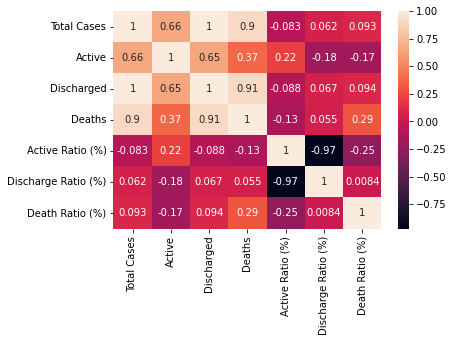

In [14]:
sns.heatmap(df.corr(), annot=True);

Correlação de linearidade positiva pelo mapa de calor:
<li>Total Cases e Discharged</li>
<li>Total Cases e Deaths</li>
<li>Discharged e Deaths</li>

Distribuição da porcetagem de mortes em comparação com o número de casos totais

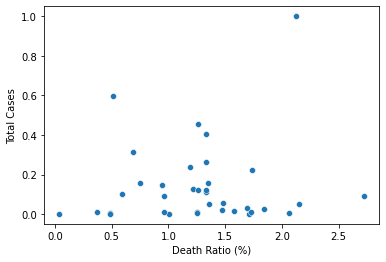

In [15]:
sns.scatterplot(data =df, x='Death Ratio (%)', y=df['Total Cases']/df['Total Cases'].max());

Distribuição do taxa de morte.

count    36.000000
mean      1.265278
std       0.563770
min       0.040000
25%       0.955000
50%       1.295000
75%       1.607500
max       2.720000
Name: Death Ratio (%), dtype: float64

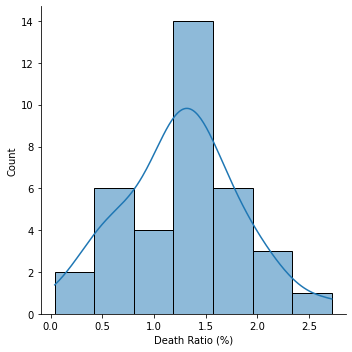

In [16]:
sns.displot(data =df, x='Death Ratio (%)',kde=True);
df['Death Ratio (%)'].describe()

Visualização de situação de casos totais por estado.

In [17]:
fig = px.bar(df,y="State/UTs",x="Total Cases",color="Death Ratio (%)", title= "Caso Totais")
fig.show()


In [18]:
px.bar(df,y="State/UTs",x="Deaths",color="Death Ratio (%)",title= "Total de Mortes")

Estados com maiores número de casos.

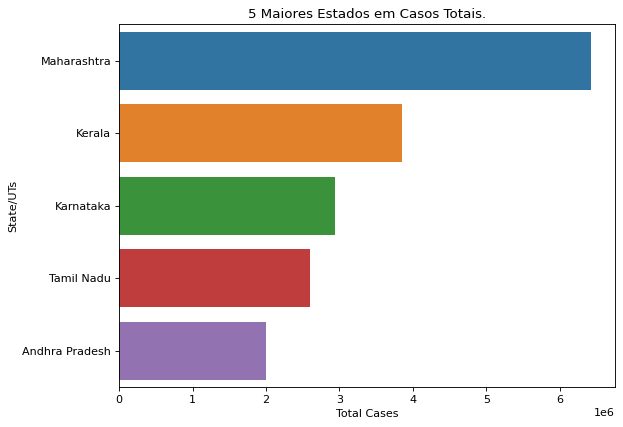

In [19]:
dfplt = df.sort_values(by='Total Cases', ascending=False).head()
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(data=dfplt,x='Total Cases',y='State/UTs').set_title('5 Maiores Estados em Casos Totais.');

Estados com maiores número de Mortes.

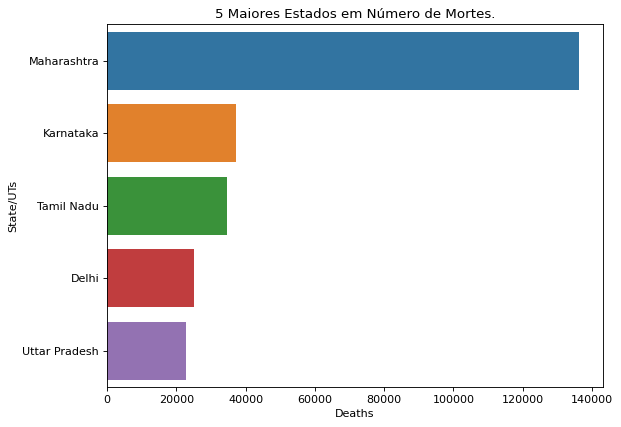

In [20]:
dfplt = df.sort_values(by='Deaths', ascending=False).head()
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(data=dfplt,x='Deaths',y='State/UTs').set_title('5 Maiores Estados em Número de Mortes.');

Estados com maiores número de Taxa de Mortalidade.

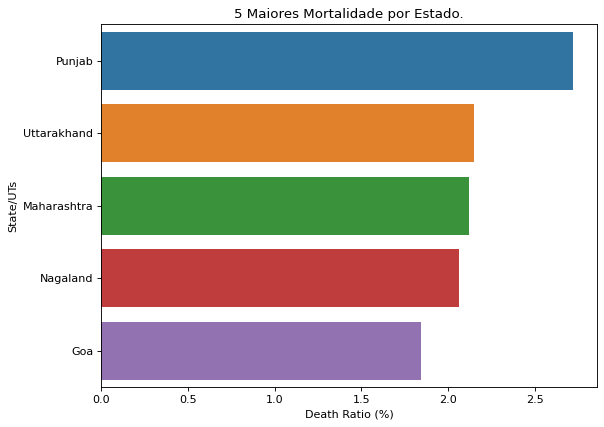

In [21]:
dfplt = df.sort_values(by='Death Ratio (%)', ascending=False).head()
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(data=dfplt,x='Death Ratio (%)',y='State/UTs').set_title('5 Maiores Mortalidade por Estado.');